# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Import Necessary Packages

In [16]:
import numpy as np
import pandas as pd



### Step 2: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [17]:
# Load the dataset
data = pd.read_csv('fuel_econ.csv')

# Display the first few rows of the dataset
data.head()



,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Handle Non-Numeric Data
- Identify non-numeric columns.
- Apply one-hot encoding to categorical columns.
- Impute missing values in numeric columns.

In [18]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

# Check if there are any non-numeric columns
if len(non_numeric_columns) > 0:
    # Apply one-hot encoding to categorical columns
    encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use `sparse_output=False` for dense arrays
    encoded_data = encoder.fit_transform(data[non_numeric_columns])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(non_numeric_columns))
else:
    # If there are no non-numeric columns, create an empty DataFrame
    encoded_df = pd.DataFrame()

# Impute missing values in numeric columns
numeric_data = data.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
imputed_numeric_data = imputer.fit_transform(numeric_data)
imputed_numeric_df = pd.DataFrame(imputed_numeric_data, columns=numeric_data.columns)

# Combine encoded categorical data and imputed numeric data
if not encoded_df.empty:
    processed_data = pd.concat([imputed_numeric_df, encoded_df], axis=1)
else:
    processed_data = imputed_numeric_df  # If no categorical columns, use only numeric data

# Display the first few rows of the processed data
processed_data.head()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,...,trans_Automatic 7-spd,trans_Automatic 8-spd,trans_Automatic 9-spd,trans_Manual 5-spd,trans_Manual 6-spd,trans_Manual 7-spd,fuelType_Midgrade Gasoline,fuelType_Natural Gas,fuelType_Premium Gasoline,fuelType_Regular Gasoline
0,32204.0,2013.0,6.0,3.8,79.0,0.0,16.4596,20.2988,22.5568,30.1798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,32205.0,2013.0,4.0,2.0,94.0,0.0,21.8706,26.9770,31.0367,42.4936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,32206.0,2013.0,6.0,3.6,94.0,0.0,17.4935,21.2000,26.5716,35.1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,32207.0,2013.0,6.0,3.6,94.0,0.0,16.9415,20.5000,25.2190,33.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32208.0,2013.0,4.0,2.4,0.0,95.0,24.7726,31.9796,35.5340,51.8816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


---

## Step 3: Standardize the Data

Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(processed_data)

# Display the first few rows of standardized data
standardized_data[:5]

array([[-1.73714048, -1.47583548,  0.28310163, ..., -0.02764302,
         0.84070013, -0.79476067],
       [-1.73668367, -1.47583548, -0.78181585, ..., -0.02764302,
         0.84070013, -0.79476067],
       [-1.73622685, -1.47583548,  0.28310163, ..., -0.02764302,
         0.84070013, -0.79476067],
       [-1.73577004, -1.47583548,  0.28310163, ..., -0.02764302,
         0.84070013, -0.79476067],
       [-1.73531322, -1.47583548, -0.78181585, ..., -0.02764302,
        -1.18948476,  1.25824043]])

---

## Step 4: Calculate the Covariance Matrix

The covariance matrix helps us understand how the features are related to each other.

In [20]:
# Calculate the covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Display the covariance matrix
cov_matrix

array([[ 1.00025458,  0.98591866, -0.06011148, ..., -0.0164336 ,
         0.03205579, -0.02254824],
       [ 0.98591866,  1.00025458, -0.05532701, ..., -0.02448998,
         0.03933023, -0.0283311 ],
       [-0.06011148, -0.05532701,  1.00025458, ..., -0.02161725,
         0.40480546, -0.4016625 ],
       ...,
       [-0.0164336 , -0.02448998, -0.02161725, ...,  1.00025458,
        -0.03288932, -0.02197518],
       [ 0.03205579,  0.03933023,  0.40480546, ..., -0.03288932,
         1.00025458, -0.94559637],
       [-0.02254824, -0.0283311 , -0.4016625 , ..., -0.02197518,
        -0.94559637,  1.00025458]])

---

## Step 5: Perform Eigendecomposition

Eigendecomposition of the covariance matrix gives us the eigenvalues and eigenvectors, which are essential for PCA.

In [21]:
# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues = np.real(eigenvalues)  # Ensure eigenvalues are real
eigenvectors = np.real(eigenvectors)  # Ensure eigenvectors are real

# Display eigenvalues and eigenvectors
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [ 1.24750811e+01  4.43111117e+00  3.63696624e+00  3.29713628e+00
  3.22758499e+00  3.13839017e+00  3.02271454e+00  2.95234987e+00
  2.77606385e+00  2.72452887e+00  2.64780861e+00  2.52436535e+00
  2.44483376e+00  2.37874329e+00  2.33606142e+00  2.31162398e+00
  2.28003459e+00  2.24905206e+00  2.22585400e+00  2.20307904e+00
  2.15449741e+00  2.13208481e+00  2.12166362e+00  2.11002930e+00
  2.08209498e+00  2.07992709e+00  2.06871587e+00  2.05818309e+00
  2.05338755e+00  1.98778725e+00  2.03687161e+00  2.03060807e+00
  2.03549698e+00  2.01791368e+00  2.00967452e+00  2.01189592e+00
  1.99545392e+00  1.91261674e+00  1.93847399e+00  1.94922597e+00
  2.02452273e+00  2.00621105e+00  1.85589987e+00  1.88400912e+00
  1.78262255e+00  7.78659903e-02  8.84226668e-02  9.34874554e-02
  1.65843738e-01  1.09928318e-01  1.24378216e-01  1.48061770e-01
  1.34815170e-01  6.44987280e-02  4.60897662e-02  4.57354711e-02
  3.67726671e-02  3.24623794e-02  3.04166376e-02  1.92786883e-01
  2.08542491

---

## Step 6: Sort Eigenvalues and Eigenvectors

Sort the eigenvalues and eigenvectors in descending order of eigenvalue magnitude.

In [22]:
# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display sorted eigenvalues and eigenvectors
print("Sorted Eigenvalues:", sorted_eigenvalues)
print("Sorted Eigenvectors:", sorted_eigenvectors)

Sorted Eigenvalues: [ 1.24750811e+01  4.43111117e+00  3.63696624e+00  3.29713628e+00
  3.22758499e+00  3.13839017e+00  3.02271454e+00  2.95234987e+00
  2.77606385e+00  2.72452887e+00  2.64780861e+00  2.52436535e+00
  2.44483376e+00  2.37874329e+00  2.33606142e+00  2.31162398e+00
  2.28003459e+00  2.24905206e+00  2.22585400e+00  2.20307904e+00
  2.15449741e+00  2.13208481e+00  2.12166362e+00  2.11002930e+00
  2.08209498e+00  2.07992709e+00  2.06871587e+00  2.05818309e+00
  2.05338755e+00  2.03687161e+00  2.03549698e+00  2.03060807e+00
  2.02452273e+00  2.01791368e+00  2.01189592e+00  2.00967452e+00
  2.00621105e+00  1.99545392e+00  1.98778725e+00  1.94922597e+00
  1.93847399e+00  1.91261674e+00  1.88400912e+00  1.85589987e+00
  1.78262255e+00  1.75783620e+00  1.69891405e+00  1.67858963e+00
  1.65852881e+00  1.64136745e+00  1.60271760e+00  1.58364161e+00
  1.57204217e+00  1.53324271e+00  1.50921680e+00  1.50391407e+00
  1.49061029e+00  1.46463722e+00  1.43341000e+00  1.40153679e+00
  1.3

---

## Step 7: Calculate Explained Variance

Calculate the explained variance ratio and cumulative explained variance to determine how many principal components to retain.

In [10]:
# Calculate explained variance
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance)

# Display explained variance
print("Explained Variance Ratios:", explained_variance)
print("Cumulative Explained Variance:", cumulative_explained_variance)

# Select the number of components to retain (e.g., 95% variance)
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components to retain: {num_components}")

Explained Variance Ratios: [ 1.45190990e-02  5.15714013e-03  4.23287610e-03  3.83736566e-03
  3.75641852e-03  3.65260931e-03  3.51798045e-03  3.43608667e-03
  3.23091652e-03  3.17093764e-03  3.08164692e-03  2.93797771e-03
  2.84541502e-03  2.76849576e-03  2.71882055e-03  2.69037908e-03
  2.65361383e-03  2.61755488e-03  2.59055585e-03  2.56404926e-03
  2.50750763e-03  2.48142276e-03  2.46929409e-03  2.45575351e-03
  2.42324220e-03  2.42071911e-03  2.40767095e-03  2.39541239e-03
  2.38983112e-03  2.37060907e-03  2.36900920e-03  2.36331926e-03
  2.35623685e-03  2.34854491e-03  2.34154116e-03  2.33895579e-03
  2.33492483e-03  2.32240517e-03  2.31348233e-03  2.26860286e-03
  2.25608919e-03  2.22599528e-03  2.19270035e-03  2.15998546e-03
  2.07470180e-03  2.04585424e-03  1.97727782e-03  1.95362329e-03
  1.93027554e-03  1.91030232e-03  1.86531977e-03  1.84311821e-03
  1.82961822e-03  1.78446156e-03  1.75649905e-03  1.75032748e-03
  1.73484389e-03  1.70461518e-03  1.66827145e-03  1.63117587e-0

---

## Step 8: Project Data onto Principal Components

Project the standardized data onto the selected principal components.

In [23]:
# Project data onto principal components
reduced_data = np.dot(standardized_data, sorted_eigenvectors[:, :num_components])

# Display the shape and first few rows of reduced data
print(f'Reduced Data Shape: {reduced_data.shape}')
print("First 5 rows of reduced data:")
print(reduced_data[:5])

Reduced Data Shape: (3929, 733)
First 5 rows of reduced data:
[[-2.79947447e+00 -8.95711617e-01  7.13049978e-02 ...  6.39823177e-12
  -1.53464849e-11  6.91637372e-12]
 [ 8.82798056e-01 -2.32134874e+00  1.14572479e+00 ...  3.74643545e-12
   1.67544581e-12 -2.57245787e-12]
 [-1.22773527e+00 -1.16528513e+00  1.93914233e+00 ...  3.77871259e-12
   1.61848269e-12 -2.58868621e-12]
 [-2.28815959e+00 -7.16505273e-01  1.05853894e+00 ...  1.21174598e-12
  -1.18936458e-11 -9.98964019e-12]
 [ 3.73578159e+00  1.83629160e+00  1.67070477e+00 ... -5.11673369e-11
   2.25143112e-11  8.70732826e-11]]


---

## Step 9: Visualize Before and After PCA

Plot the original data (first two features) and the reduced data after PCA to compare the results.

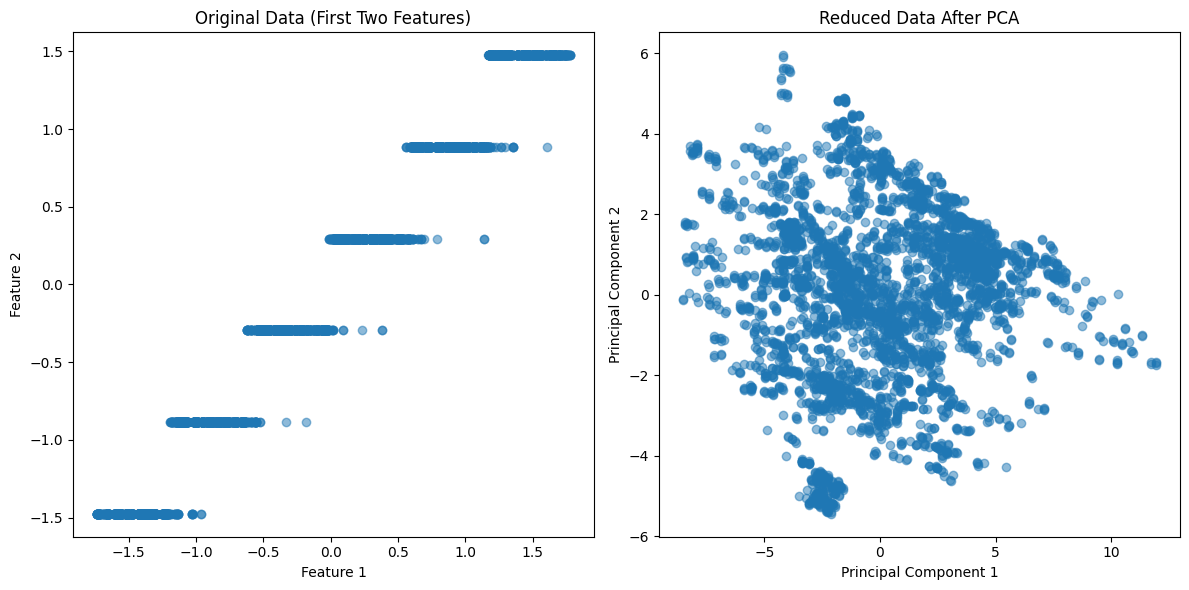

In [15]:
import matplotlib.pyplot as plt

# Plot original data (first two features)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5)
plt.title('Original Data (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title('Reduced Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()